# Random Walk
> Sutton, R. S., & Barto, A. G. (2018). Reinforcement learning: An introduction. MIT press. (Example 6.2, 9.1)

- **states**: $1 .. N$
- **actions**: `move`
- **transition**: pick a state $[s \in s-k:s-1 ; s+1:s+k] $ with uniform probability
- **terminal**: $s \leq 1 \vee s \geq N$
- **reward**: 
    - $s \leq 1 \rightarrow -1$
    - $s \geq N \rightarrow +1$
    - $1 < s < N \rightarrow 0$

In [1]:
import numpy as np 
import pandas as pd
from collections import defaultdict
from vfa.algorithms import monte_carlo_first_visit

In [2]:
class RandomWalkEnv:
    def __init__(self, start: int, end: int, step: int) -> None:
        self.start = start 
        self.N = end 
        self.k = step 
    def outcome(self, action: int, state: int):
        s_primes = np.append(np.arange(state - self.k, state), np.arange(state + 1, state + self.k + 1))
        s_prime = np.random.choice(s_primes)
        if s_prime >= self.N:
            return self.N
        elif s_prime <= self.start:
            return self.start
        else:
            return s_prime
    def is_terminal(self, state):
        if state <= self.start or state >= self.N:
            return True
        else:
            return False
    def reward(self, state):
        if state <= self.start:
            return -1
        elif state >= self.N:
            return 1
        else:
            return 0

In [3]:
class Policy:
    def __getitem__(self, state):
        return 0
    def generate_episode(self, state: int, environment: RandomWalkEnv, max_iter: int = 1000):
        current_state = state
        episode = []
        for i in range(max_iter):
            a = self[current_state]
            s_prime = environment.outcome(a, state=current_state)
            r = environment.reward(s_prime)
            episode.append((current_state, a, r))
            if environment.is_terminal(s_prime):
                break
            else:
                current_state = s_prime
        return episode
            

In [4]:
class Agent:
    def __init__(self, initial_state: np.ndarray) -> None:
        self.state = initial_state

In [5]:
env = RandomWalkEnv(start=0, end=1000, step=100)
pi = Policy()
agent = Agent(initial_state=np.array([5, 2]))

## Monte Carlo VFA

In [6]:
# Status to feature
x = lambda s: np.array([(s - env.start), (s - env.N)])
# x = lambda s: np.array([-s])

In [7]:
x(950), env.N

(array([950, -50]), 1000)

In [8]:
w = monte_carlo_first_visit(env=env, policy=pi, x=x, shape=2, max_episode_len=200, iterations=10000, alpha=.0000001)

100%|██████████| 10000/10000 [00:17<00:00, 561.94it/s]


In [9]:
import matplotlib.pyplot as plt 

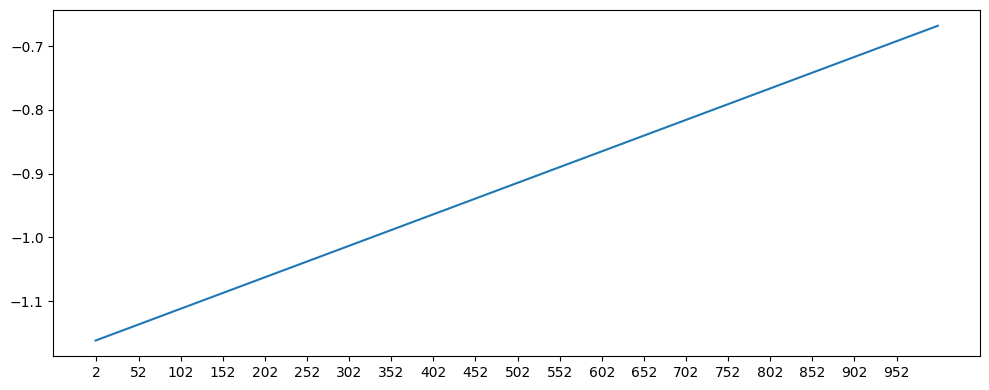

In [10]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(range(env.N+1), [x(i).T.dot(w) for i in range(env.N+1)])
ax.set_xticks(range(1, env.N+1, 50))
ax.set_xticklabels([str(i+1) for i in range(1, env.N+1, 50)])
plt.tight_layout()
plt.show()

## TD(0) VFA

In [11]:
from vfa.algorithms import td_zero

In [16]:
w = td_zero(env=env, policy=pi, x=x, shape=2, iterations=10000, alpha=.000001)

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [00:01<00:00, 8701.74it/s]


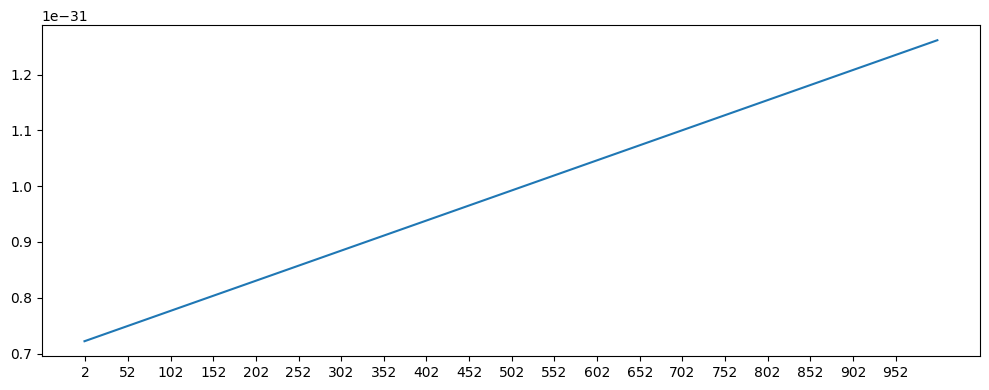

In [17]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(range(env.N+1), [x(i).T.dot(w) for i in range(env.N+1)])
ax.set_xticks(range(1, env.N+1, 50))
ax.set_xticklabels([str(i+1) for i in range(1, env.N+1, 50)])
plt.tight_layout()
plt.show()